<a href="https://colab.research.google.com/github/adellabr/LinearRegression/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Answer the questions**

##### 1. Derive an analytical solution to the regression problem. Use a vector form of the equation.

Для аналитического решения линейной регрессии используется **метод наименьших квадратов (МНК)**

L(w) = $\sum^N_{i=1}(xᵀₙw - yₙ)^2$ ->$ min_w$

##### 2. What changes in the solution when L1 and L2 regularizations are added to the loss function.

L1, L2 регуляризаторы необходимы для устранения переобученности моделей. \
L1 регуляризатор выделяет линейно независимые признаки, обнуляя остальные. \
L2 регуляризатор предотвращает диспропорцию коэфициентов, когда одни кэфициенты больше других на порядок. \
То есть, при L1 обнуляются определенные коэфициенты, а при L2 минимизируются все коэфициенты.

##### 3. Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?

L1 регуляризатор используют для выбора признаков, так как он позволяет исключить незначимые.

L1 регуляризация добавляет штраф в виде суммы абсолютных значений коэффициентов. Этот штраф визуально представляет собой «ромб». \
Минимум будет находится в точке пересечения функции потерь и функции регуляризации. Если точка пересения находится на вершине ромба, то один из признаков обнуляется.

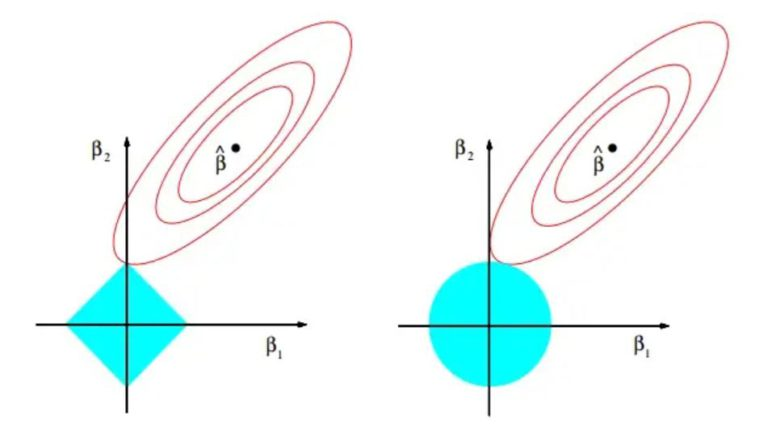

##### 4. Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies.

Для применения линейной регрессии для нелинейных зависимотсей можно создать полиноминальные признаки для апроксимации

## **2. Introduction — make all the preprocessing staff**

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [98]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
df = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/train.json')

In [100]:
decode_dict = {
    'low': 0,
    'medium': 1,
    'high': 2
}

df['interest_level'] = df['interest_level'].replace(decode_dict).astype(np.int8)

<ipython-input-100-359a6d668c06>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['interest_level'] = df['interest_level'].replace(decode_dict).astype(np.int8)


## **3. Intro data analysis**

In [101]:
df['features'] = df['features'].str.join(',')
df['features'] = df['features'].replace(['"', "'", ' '], "", regex=True)

In [102]:
X = df.drop('price', axis = 1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [103]:
feat_list = []
for index, row in x_train.iterrows():
  feat_list.extend(row['features'].split(','))

In [104]:
uniq_feat_count = len(np.unique(np.array(feat_list)))
print("Amount of unique values:", uniq_feat_count)

Amount of unique values: 1320


In [105]:
feat_counter = Counter(feat_list)
train_features = feat_counter.most_common(21)
train_features

[('Elevator', 19426),
 ('CatsAllowed', 17694),
 ('HardwoodFloors', 17591),
 ('DogsAllowed', 16555),
 ('Doorman', 15698),
 ('Dishwasher', 15250),
 ('NoFee', 13537),
 ('LaundryinBuilding', 12295),
 ('FitnessCenter', 9931),
 ('Pre-War', 6873),
 ('LaundryinUnit', 6509),
 ('RoofDeck', 4943),
 ('OutdoorSpace', 3934),
 ('DiningRoom', 3810),
 ('HighSpeedInternet', 3245),
 ('', 2406),
 ('Balcony', 2209),
 ('SwimmingPool', 2066),
 ('LaundryInBuilding', 1965),
 ('NewConstruction', 1917),
 ('Terrace', 1684)]

In [106]:
X_train = x_train[['bathrooms', 'bedrooms', 'interest_level']].copy()
for feat, count in train_features:
  if feat != '':
    X_train[feat] = x_train['features'].str.contains(feat).astype(np.int8)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37014 entries, 69750 to 39699
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          37014 non-null  float64
 1   bedrooms           37014 non-null  int64  
 2   interest_level     37014 non-null  int8   
 3   Elevator           37014 non-null  int8   
 4   CatsAllowed        37014 non-null  int8   
 5   HardwoodFloors     37014 non-null  int8   
 6   DogsAllowed        37014 non-null  int8   
 7   Doorman            37014 non-null  int8   
 8   Dishwasher         37014 non-null  int8   
 9   NoFee              37014 non-null  int8   
 10  LaundryinBuilding  37014 non-null  int8   
 11  FitnessCenter      37014 non-null  int8   
 12  Pre-War            37014 non-null  int8   
 13  LaundryinUnit      37014 non-null  int8   
 14  RoofDeck           37014 non-null  int8   
 15  OutdoorSpace       37014 non-null  int8   
 16  DiningRoom         3701

In [107]:
X_train.head()

,bathrooms,bedrooms,interest_level,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
69750,1.0,3,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
94734,1.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87560,1.0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
78008,1.0,1,1,1,0,1,0,1,1,1,...,1,0,1,1,0,1,0,0,0,1
32748,1.0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [108]:
X_test = x_test[['bathrooms', 'bedrooms', 'interest_level']].copy()
for feat, count in train_features:
  if feat != '':
    X_test[feat] = x_test['features'].str.contains(feat).astype(np.int8)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12338 entries, 78578 to 67467
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          12338 non-null  float64
 1   bedrooms           12338 non-null  int64  
 2   interest_level     12338 non-null  int8   
 3   Elevator           12338 non-null  int8   
 4   CatsAllowed        12338 non-null  int8   
 5   HardwoodFloors     12338 non-null  int8   
 6   DogsAllowed        12338 non-null  int8   
 7   Doorman            12338 non-null  int8   
 8   Dishwasher         12338 non-null  int8   
 9   NoFee              12338 non-null  int8   
 10  LaundryinBuilding  12338 non-null  int8   
 11  FitnessCenter      12338 non-null  int8   
 12  Pre-War            12338 non-null  int8   
 13  LaundryinUnit      12338 non-null  int8   
 14  RoofDeck           12338 non-null  int8   
 15  OutdoorSpace       12338 non-null  int8   
 16  DiningRoom         1233

In [109]:
X_test.tail()

,bathrooms,bedrooms,interest_level,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
69931,1.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108617,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74828,1.0,2,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47536,1.0,1,0,1,1,0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
67467,1.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Models implementation — Linear regression

In [110]:
class SGD_LinearRegression:
  def __init__(self, eta0 = 0.01, max_iter = 1000, tolerance=1e-8):
    self.eta0 = eta0
    self.max_iter = max_iter
    self.tolerance = tolerance
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    previous_db = 0
    previous_dw = np.zeros(n_features)

    for i in range(self.max_iter):
      index = np.random.randint(0, n_samples)
      y_pred = np.dot(X.iloc[index], self.weights) + self.bias
      db = y_pred - y.iloc[index]
      dw = 2 * X.iloc[index] * (y_pred -y.iloc[index])

      self.bias -= self.eta0 * db
      self.weights -= self.eta0 * dw

      abs_db_reduction = np.abs(db - previous_db)
      abs_dw_reduction = np.abs(dw - previous_dw)

      if abs_db_reduction < self.tolerance and abs_dw_reduction.all() < self.tolerance:
        break

      previous_db = db
      previous_dw = dw


  def predict(self, X):
    return X @ self.weights + self.bias

In [111]:
SGD_LR = SGD_LinearRegression()
SGD_LR.fit(X_train, y_train)
Y_pred_train_sgd = SGD_LR.predict(X_train)
Y_pred_test_sgd = SGD_LR.predict(X_test)

In [112]:
def my_r2_score(y, y_pred):
  y_mean = np.mean(y)
  return 1- np.sum((y - y_pred)**2) /  np.sum((y - y_mean)**2)

In [113]:
print("r_2score train:", r2_score(y_train, Y_pred_train_sgd))
print("r_2score test:", r2_score(y_test, Y_pred_test_sgd))
print("my_r_2score train:", my_r2_score(y_train, Y_pred_train_sgd))
print("my_r_2score test:", my_r2_score(y_test, Y_pred_test_sgd))

r_2score train: 0.023288991341635534
r_2score test: 0.001794369241641447
my_r_2score train: 0.023288991341635534
my_r_2score test: 0.001794369241641447


In [114]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])
result_r2_score = pd.DataFrame(columns=['model', 'train', 'test'])

In [115]:
result_MAE.loc[len(result_MAE)] = ['SGD_LinearRegression', MAE(y_train, Y_pred_train_sgd), MAE(y_test, Y_pred_test_sgd)]
result_RMSE.loc[len(result_RMSE)] = ['SGD_LinearRegression', RMSE(y_train, Y_pred_train_sgd), RMSE(y_test, Y_pred_test_sgd)]
result_r2_score.loc[len(result_r2_score)] = ['SGD_LinearRegression', r2_score(y_train, Y_pred_train_sgd), r2_score(y_test, Y_pred_test_sgd)]

In [116]:
LR = LinearRegression()
LR.fit(X_train, y_train)
Y_pred_train_LR = LR.predict(X_train)
Y_pred_test_LR = LR.predict(X_test)

In [117]:
result_MAE.loc[len(result_MAE)] = ['LinearRegression', MAE(y_train, Y_pred_train_LR), MAE(y_test, Y_pred_test_LR)]
result_RMSE.loc[len(result_RMSE)] = ['LinearRegression', RMSE(y_train, Y_pred_train_LR), RMSE(y_test, Y_pred_test_LR)]
result_r2_score.loc[len(result_r2_score)] = ['LinearRegression', r2_score(y_train, Y_pred_train_LR), r2_score(y_test, Y_pred_test_LR)]

In [118]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953


In [119]:
result_RMSE

,model,train,test
0,SGD_LinearRegression,10041.969026,40435.140926
1,LinearRegression,10013.914691,40424.672209


In [120]:
result_r2_score

,model,train,test
0,SGD_LinearRegression,0.023289,0.001794
1,LinearRegression,0.028739,0.002311


#### Linear regression with the analytical solution

In [121]:
class LSM_Regression:
  def __init__(self):
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    X = np.insert(X, 0, 1, axis=1)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    self.bias, self.weights = w[0], w[1:]


  def predict(self, X):
    return X @ self.weights + self.bias

In [122]:
lsm_reg = LSM_Regression()
lsm_reg.fit(X_train, y_train)
Y_pred_train_lsm = lsm_reg.predict(X_train)
Y_pred_test_lsm = lsm_reg.predict(X_test)
MAE(y_train, Y_pred_train_lsm), MAE(y_test, Y_pred_test_lsm)

(978.4271885878057, 1271.0639530022502)

#### Linear regression non-stochastic gradient descent

In [123]:
class GD_Regression:
  def __init__(self, eta0 = 0.01, max_iter = 1000):
    self.eta0 = eta0
    self.max_iter = max_iter
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for i in range(self.max_iter):
      y_pred = X @ self.weights + self.bias
      db = (np.sum(y_pred - y)) / n_samples
      dw = (X.T @ (y_pred - y)) / n_samples

      self.bias -= self.eta0 * db
      self.weights -= self.eta0 * dw


  def predict(self, X):
        return X @ self.weights + self.bias

In [124]:
gd_reg = GD_Regression()
gd_reg.fit(X_train, y_train)
Y_pred_train_gd = gd_reg.predict(X_train)
Y_pred_test_gd = gd_reg.predict(X_test)
MAE(y_train, Y_pred_train_gd), MAE(y_test, Y_pred_test_gd)

(958.503855286046, 1251.8343151449196)

## 5. Regularized models implementation — Ridge, Lasso, ElasticNet

#### Ridge algoritm (L2 Regularization)

In [125]:
class RidgeRegression:
  def __init__(self,  eta0 = 0.01, max_iter = 1000, tolerance=1e-8, l2_penality = 1.0):
    self.eta0 = eta0
    self.max_iter = max_iter
    self.tolerance = tolerance
    self.weights = None
    self.bias = None
    self.l2_penality = l2_penality


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    previous_db = 0
    previous_dw = np.zeros(n_features)
    for i in range(self.max_iter):
      index = np.random.randint(0, n_samples)
      y_pred = np.dot(X.iloc[index], self.weights) + self.bias
      db = y_pred - y.iloc[index]
      dw = 2 * X.iloc[index] * (y_pred -y.iloc[index]) + self.l2_penality * self.weights

      self.bias -= self.eta0 * db
      self.weights -= self.eta0 * dw
      abs_db_reduction = np.abs(db - previous_db)
      abs_dw_reduction = np.abs(dw - previous_dw)

      if abs_db_reduction < self.tolerance and abs_dw_reduction.all() < self.tolerance:
        break

      previous_db = db
      previous_dw = dw


  def predict(self, X):
    return X @ self.weights + self.bias

In [126]:
ridge_reg = RidgeRegression()
ridge_reg.fit(X_train, y_train)
Y_pred_train_ridge = ridge_reg.predict(X_train)
Y_pred_test_ridge = ridge_reg.predict(X_test)

In [127]:
result_MAE.loc[len(result_MAE)] = ['RidgeRegression(my)', MAE(y_train, Y_pred_train_ridge), MAE(y_test, Y_pred_test_ridge)]
result_RMSE.loc[len(result_RMSE)] = ['RidgeRegression(my)', RMSE(y_train, Y_pred_train_ridge), RMSE(y_test, Y_pred_test_ridge)]
result_r2_score.loc[len(result_r2_score)] = ['RidgeRegression(my)', r2_score(y_train, Y_pred_train_ridge), r2_score(y_test, Y_pred_test_ridge)]

In [128]:
ridge = Ridge()
ridge.fit(X_train, y_train)
Y_pred_train_Ridge = ridge.predict(X_train)
Y_pred_test_Ridge = ridge.predict(X_test)

In [129]:
result_MAE.loc[len(result_MAE)] = ['Ridge', MAE(y_train, Y_pred_train_Ridge), MAE(y_test, Y_pred_test_Ridge)]
result_RMSE.loc[len(result_RMSE)] = ['Ridge', RMSE(y_train, Y_pred_train_Ridge), RMSE(y_test, Y_pred_test_Ridge)]
result_r2_score.loc[len(result_r2_score)] = ['Ridge', r2_score(y_train, Y_pred_train_Ridge), r2_score(y_test, Y_pred_test_Ridge)]

In [130]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953
2,RidgeRegression(my),928.857581,1224.624292
3,Ridge,978.387927,1271.023272


In [131]:
result_RMSE

,model,train,test
0,SGD_LinearRegression,10041.969026,40435.140926
1,LinearRegression,10013.914691,40424.672209
2,RidgeRegression(my),10064.462610,40447.203200
3,Ridge,10013.914693,40424.673367


In [132]:
result_r2_score

,model,train,test
0,SGD_LinearRegression,0.023289,0.001794
1,LinearRegression,0.028739,0.002311
2,RidgeRegression(my),0.018909,0.001199
3,Ridge,0.028739,0.002311


#### Lasso algoritm (L1 Regularization)

In [133]:
class LassoRegression:
  def __init__(self,  eta0 = 0.01, max_iter = 1000, tolerance=1e-8, l1_penality = 1.0):
    self.eta0 = eta0
    self.max_iter = max_iter
    self.tolerance = tolerance
    self.weights = None
    self.bias = None
    self.l1_penality = l1_penality

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    previous_db = 0
    previous_dw = np.zeros(n_features)
    for i in range(self.max_iter):
      index = np.random.randint(0, n_samples)
      y_pred = np.dot(X.iloc[index], self.weights) + self.bias
      db = y_pred - y.iloc[index]
      dw = 2 * X.iloc[index] * (y_pred -y.iloc[index]) + self.l1_penality * np.sign(self.weights)

      self.bias -= self.eta0 * db
      self.weights -= self.eta0 * dw
      abs_db_reduction = np.abs(db - previous_db)
      abs_dw_reduction = np.abs(dw - previous_dw)

      if abs_db_reduction < self.tolerance and abs_dw_reduction.all() < self.tolerance:
        break

      previous_db = db
      previous_dw = dw


  def predict(self, X):
    return X @ self.weights + self.bias


In [134]:
lasso_reg = LassoRegression()
lasso_reg.fit(X_train, y_train)
Y_pred_train_lasso = lasso_reg.predict(X_train)
Y_pred_test_lasso = lasso_reg.predict(X_test)

In [135]:
result_MAE.loc[len(result_MAE)] = ['LassoRegression(my)', MAE(y_train, Y_pred_train_lasso), MAE(y_test, Y_pred_test_lasso)]
result_RMSE.loc[len(result_RMSE)] = ['LassoRegression(my)', RMSE(y_train, Y_pred_train_lasso), RMSE(y_test, Y_pred_test_lasso)]
result_r2_score.loc[len(result_r2_score)] = ['LassoRegression(my)', r2_score(y_train, Y_pred_train_lasso), r2_score(y_test, Y_pred_test_lasso)]

In [136]:
lasso = Lasso()
lasso.fit(X_train, y_train)
Y_pred_train_Lasso = lasso.predict(X_train)
Y_pred_test_Lasso = lasso.predict(X_test)

In [137]:
result_MAE.loc[len(result_MAE)] = ['Lasso', MAE(y_train, Y_pred_train_Lasso), MAE(y_test, Y_pred_test_Lasso)]
result_RMSE.loc[len(result_RMSE)] = ['Lasso', RMSE(y_train, Y_pred_train_Lasso), RMSE(y_test, Y_pred_test_Lasso)]
result_r2_score.loc[len(result_r2_score)] = ['Lasso', r2_score(y_train, Y_pred_train_Lasso), r2_score(y_test, Y_pred_test_Lasso)]

In [138]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953
2,RidgeRegression(my),928.857581,1224.624292
3,Ridge,978.387927,1271.023272
4,LassoRegression(my),897.991382,1193.428152
5,Lasso,975.638098,1268.086319


In [139]:
result_RMSE

,model,train,test
0,SGD_LinearRegression,10041.969026,40435.140926
1,LinearRegression,10013.914691,40424.672209
2,RidgeRegression(my),10064.462610,40447.203200
3,Ridge,10013.914693,40424.673367
4,LassoRegression(my),10029.839950,40437.201429
5,Lasso,10013.933222,40424.858066


In [140]:
result_r2_score

,model,train,test
0,SGD_LinearRegression,0.023289,0.001794
1,LinearRegression,0.028739,0.002311
2,RidgeRegression(my),0.018909,0.001199
3,Ridge,0.028739,0.002311
4,LassoRegression(my),0.025647,0.001693
5,Lasso,0.028735,0.002302


#### ElasticNet algoritm

In [141]:
class ElasticNetRegression:
  def __init__(self, alpha = 1.0, L1_ratio = 0.5, eta0 = 0.01, max_iter = 1000, tolerance=1e-8):
    self.alpha = alpha
    self.L1_ratio  = L1_ratio
    self.eta0 = eta0
    self.max_iter = max_iter
    self.tolerance = tolerance
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    previous_db = 0
    previous_dw = np.zeros(n_features)
    for i in range(self.max_iter):
      index = np.random.randint(0, n_samples)
      y_pred = np.dot(X.iloc[index], self.weights) + self.bias
      db = y_pred - y.iloc[index]
      dw = 2 * X.iloc[index] * (y_pred -y.iloc[index]) + self.alpha * (self.L1_ratio * np.sign(self.weights) + (1 - self.L1_ratio) * self.weights)

      self.bias -= self.eta0 * db
      self.weights -= self.eta0 * dw
      abs_db_reduction = np.abs(db - previous_db)
      abs_dw_reduction = np.abs(dw - previous_dw)

      if abs_db_reduction < self.tolerance and abs_dw_reduction.all() < self.tolerance:
        break

      previous_db = db
      previous_dw = dw


  def predict(self, X):
    return X @ self.weights + self.bias

In [142]:
elasticN = ElasticNetRegression()
elasticN.fit(X_train, y_train)
Y_pred_train_EN = elasticN.predict(X_train)
Y_pred_test_EN = elasticN.predict(X_test)

In [143]:
result_MAE.loc[len(result_MAE)] = ['ElasticNetRegression(my)', MAE(y_train, Y_pred_train_EN), MAE(y_test, Y_pred_test_EN)]
result_RMSE.loc[len(result_RMSE)] = ['ElasticNetRegression(my)', RMSE(y_train, Y_pred_train_EN), RMSE(y_test, Y_pred_test_EN)]
result_r2_score.loc[len(result_r2_score)] = ['ElasticNetRegression(my)', r2_score(y_train, Y_pred_train_EN), r2_score(y_test, Y_pred_test_EN)]

In [144]:
elasticNet = ElasticNet()
elasticNet.fit(X_train, y_train)
Y_pred_train_ENet = elasticNet.predict(X_train)
Y_pred_test_ENet = elasticNet.predict(X_test)

In [145]:
result_MAE.loc[len(result_MAE)] = ['ElasticNet)', MAE(y_train, Y_pred_train_ENet), MAE(y_test, Y_pred_test_ENet)]
result_RMSE.loc[len(result_RMSE)] = ['ElasticNet', RMSE(y_train, Y_pred_train_ENet), RMSE(y_test, Y_pred_test_ENet)]
result_r2_score.loc[len(result_r2_score)] = ['ElasticNet', r2_score(y_train, Y_pred_train_ENet), r2_score(y_test, Y_pred_test_ENet)]

In [146]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953
2,RidgeRegression(my),928.857581,1224.624292
3,Ridge,978.387927,1271.023272
4,LassoRegression(my),897.991382,1193.428152
5,Lasso,975.638098,1268.086319
6,ElasticNetRegression(my),941.114333,1234.766386
7,ElasticNet),992.065623,1288.163643


In [147]:
result_RMSE

,model,train,test
0,SGD_LinearRegression,10041.969026,40435.140926
1,LinearRegression,10013.914691,40424.672209
2,RidgeRegression(my),10064.462610,40447.203200
3,Ridge,10013.914693,40424.673367
4,LassoRegression(my),10029.839950,40437.201429
5,Lasso,10013.933222,40424.858066
6,ElasticNetRegression(my),10070.473879,40449.112859
7,ElasticNet,10052.003832,40439.389956


In [148]:
result_r2_score

,model,train,test
0,SGD_LinearRegression,0.023289,0.001794
1,LinearRegression,0.028739,0.002311
2,RidgeRegression(my),0.018909,0.001199
3,Ridge,0.028739,0.002311
4,LassoRegression(my),0.025647,0.001693
5,Lasso,0.028735,0.002302
6,ElasticNetRegression(my),0.017736,0.001104
7,ElasticNet,0.021336,0.001585


## 6. Feature normalization

Ключевая цель нормализации — приведение различных данных в самых разных единицах измерения и диапазонах значений к единому виду, который позволит сравнивать их между собой или использовать для расчёта схожести объектов.
Нормализация необходима при применении методов градиентного спуска, так как одни парамаетры будут иметь намного больший вес, чем другие

Mathematical formula for MinMaxScaler: X_std = (X - X.min) / (X.max - X.min)

### MinMaxScaler

In [149]:
class MyMinMaxScaler:
  def __init__(self):
    self.data_min_ = None
    self.data_max_ = None

  def fit(self, X):
    self.data_min_ = np.min(X, axis=0).to_numpy()
    self.data_max_ = np.max(X, axis=0).to_numpy()

  def transform(self, X):
    data_array = X.to_numpy()
    if self.data_min_ is None or self.data_max_ is None:
      raise RuntimeError("RuntimeError")
    return (data_array - self.data_min_) / (self.data_max_ - self.data_min_)

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

In [150]:
myMinMax = MyMinMaxScaler()
normal_X_train_my = myMinMax.fit_transform(X_train)

MinMax = MinMaxScaler()
normal_X_train = MinMax.fit_transform(X_train)

In [151]:
normal_X_train_my

array([[0.1  , 0.375, 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.25 , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.1  , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [152]:
normal_X_train

array([[0.1  , 0.375, 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.25 , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.1  , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.1  , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [153]:
np.allclose(normal_X_train_my, normal_X_train)

True

### StandardScaler

In [154]:
class MyStandartScaler:
  def __init__(self):
    self.mean_ = None
    self.var_ = None

  def fit(self, X):
    self.mean_ = np.mean(X, axis=0).to_numpy()
    self.var_ = np.std(X, axis=0).to_numpy()

  def transform(self, X):
    data_array = X.to_numpy()
    if self.mean_ is None or self.var_ is None:
      raise RuntimeError("RuntimeError")
    return (data_array - self.mean_) / self.var_

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

In [155]:
standart_my = MyStandartScaler()
standart_X_train_my = standart_my.fit_transform(X_train)

standart = StandardScaler()
standart_X_train = standart.fit_transform(X_train)

In [156]:
standart_X_train_my

array([[-0.42369969,  1.30737134,  0.98204713, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969,  0.41198707, -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -0.4833972 , -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       ...,
       [-0.42369969, -1.37878147,  0.98204713, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -0.4833972 , -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -1.37878147, -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768]])

In [157]:
standart_X_train

array([[-0.42369969,  1.30737134,  0.98204713, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969,  0.41198707, -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -0.4833972 , -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       ...,
       [-0.42369969, -1.37878147,  0.98204713, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -0.4833972 , -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768],
       [-0.42369969, -1.37878147, -0.61236872, ..., -0.23677915,
        -0.23370933, -0.21967768]])

In [158]:
np.allclose(standart_X_train, standart_X_train_my)

True

## 7. Fit models with normalization

In [159]:
normal_X_test = MinMax.transform(X_test)
standart_X_test = standart.transform(X_test)

#### Linear Regression with MinMaxScaler

In [160]:
LR_norm = LinearRegression()
LR_norm.fit(normal_X_train, y_train)
Y_pred_train_LR_norm = LR_norm.predict(normal_X_train)
Y_pred_test_LR_norm = LR_norm.predict(normal_X_test)

In [161]:
result_MAE.loc[len(result_MAE)] = ['Linear Regression MinMaxScaler', MAE(y_train, Y_pred_train_LR_norm), MAE(y_test, Y_pred_test_LR_norm)]
result_RMSE.loc[len(result_RMSE)] = ['Linear Regression MinMaxScaler', RMSE(y_train, Y_pred_train_LR_norm), RMSE(y_test, Y_pred_test_LR_norm)]
result_r2_score.loc[len(result_r2_score)] = ['Linear Regression MinMaxScaler', r2_score(y_train, Y_pred_train_LR_norm), r2_score(y_test, Y_pred_test_LR_norm)]

#### Ridge with MinMaxScaler

In [162]:
Ridge_norm = Ridge()
Ridge_norm.fit(normal_X_train, y_train)
Y_pred_train_Ridge_norm = Ridge_norm.predict(normal_X_train)
Y_pred_test_Ridge_norm = Ridge_norm.predict(normal_X_test)

In [163]:
result_MAE.loc[len(result_MAE)] = ['Ridge MinMaxScaler', MAE(y_train, Y_pred_train_Ridge_norm), MAE(y_test, Y_pred_test_Ridge_norm)]
result_RMSE.loc[len(result_RMSE)] = ['Ridge MinMaxScaler', RMSE(y_train, Y_pred_train_Ridge_norm), RMSE(y_test, Y_pred_test_Ridge_norm)]
result_r2_score.loc[len(result_r2_score)] = ['Ridge MinMaxScaler', r2_score(y_train, Y_pred_train_Ridge_norm), r2_score(y_test, Y_pred_test_Ridge_norm)]

#### Lasso with MinMaxScaler

In [164]:
Lasso_norm = Lasso()
Lasso_norm.fit(normal_X_train, y_train)
Y_pred_train_Lasso_norm = Lasso_norm.predict(normal_X_train)
Y_pred_test_Lasso_norm = Lasso_norm.predict(normal_X_test)

In [165]:
result_MAE.loc[len(result_MAE)] = ['Lasso MinMaxScaler', MAE(y_train, Y_pred_train_Lasso_norm), MAE(y_test, Y_pred_test_Lasso_norm)]
result_RMSE.loc[len(result_RMSE)] = ['Lasso MinMaxScaler', RMSE(y_train, Y_pred_train_Lasso_norm), RMSE(y_test, Y_pred_test_Lasso_norm)]
result_r2_score.loc[len(result_r2_score)] = ['Lasso MinMaxScaler', r2_score(y_train, Y_pred_train_Lasso_norm), r2_score(y_test, Y_pred_test_Lasso_norm)]

#### ElasticNet with MinMaxScaler

In [166]:
ElasticNet_norm = ElasticNet()
ElasticNet_norm.fit(normal_X_train, y_train)
Y_pred_train_ElasticNet_norm = ElasticNet_norm.predict(normal_X_train)
Y_pred_test_ElasticNet_norm = ElasticNet_norm.predict(normal_X_test)

In [167]:
result_MAE.loc[len(result_MAE)] = ['ElasticNet MinMaxScaler', MAE(y_train, Y_pred_train_ElasticNet_norm), MAE(y_test, Y_pred_test_ElasticNet_norm)]
result_RMSE.loc[len(result_RMSE)] = ['ElasticNet MinMaxScaler', RMSE(y_train, Y_pred_train_ElasticNet_norm), RMSE(y_test, Y_pred_test_ElasticNet_norm)]
result_r2_score.loc[len(result_r2_score)] = ['ElasticNet MinMaxScaler', r2_score(y_train, Y_pred_train_ElasticNet_norm), r2_score(y_test, Y_pred_test_ElasticNet_norm)]

#### Linear Regression with StandardScaler

In [168]:
LR_std = LinearRegression()
LR_std.fit(standart_X_train, y_train)
Y_pred_train_LR_std = LR_std.predict(standart_X_train)
Y_pred_test_LR_std = LR_std.predict(standart_X_test)

In [169]:
result_MAE.loc[len(result_MAE)] = ['Linear Regression StandardScaler', MAE(y_train, Y_pred_train_LR_std), MAE(y_test, Y_pred_test_LR_std)]
result_RMSE.loc[len(result_RMSE)] = ['Linear Regression StandardScaler', RMSE(y_train, Y_pred_train_LR_std), RMSE(y_test, Y_pred_test_LR_std)]
result_r2_score.loc[len(result_r2_score)] = ['Linear Regression StandardScaler', r2_score(y_train, Y_pred_train_LR_std), r2_score(y_test, Y_pred_test_LR_std)]

#### Ridge with StandardScaler

In [170]:
Ridge_std = Ridge()
Ridge_std.fit(standart_X_train, y_train)
Y_pred_train_Ridge_std = Ridge_std.predict(standart_X_train)
Y_pred_test_Ridge_std = Ridge_std.predict(standart_X_test)

In [171]:
result_MAE.loc[len(result_MAE)] = ['Ridge StandardScaler', MAE(y_train, Y_pred_train_Ridge_std), MAE(y_test, Y_pred_test_Ridge_std)]
result_RMSE.loc[len(result_RMSE)] = ['Ridge StandardScaler', RMSE(y_train, Y_pred_train_Ridge_std), RMSE(y_test, Y_pred_test_Ridge_std)]
result_r2_score.loc[len(result_r2_score)] = ['Ridge StandardScaler', r2_score(y_train, Y_pred_train_Ridge_std), r2_score(y_test, Y_pred_test_Ridge_std)]

#### Lasso with StandardScaler

In [172]:
Lasso_std = Lasso()
Lasso_std.fit(standart_X_train, y_train)
Y_pred_train_Lasso_std = Lasso_std.predict(standart_X_train)
Y_pred_test_Lasso_std = Lasso_std.predict(standart_X_test)

In [173]:
result_MAE.loc[len(result_MAE)] = ['Lasso StandardScaler', MAE(y_train, Y_pred_train_Lasso_std), MAE(y_test, Y_pred_test_Lasso_std)]
result_RMSE.loc[len(result_RMSE)] = ['Lasso StandardScaler', RMSE(y_train, Y_pred_train_Lasso_std), RMSE(y_test, Y_pred_test_Lasso_std)]
result_r2_score.loc[len(result_r2_score)] = ['Lasso StandardScaler', r2_score(y_train, Y_pred_train_Lasso_std), r2_score(y_test, Y_pred_test_Lasso_std)]

#### ElasticNet with StandardScaler

In [174]:
ElasticNet_std = ElasticNet()
ElasticNet_std.fit(standart_X_train, y_train)
Y_pred_train_ElasticNet_std = ElasticNet_std.predict(standart_X_train)
Y_pred_test_ElasticNet_std = ElasticNet_std.predict(standart_X_test)

In [175]:
result_MAE.loc[len(result_MAE)] = ['ElasticNet StandardScaler', MAE(y_train, Y_pred_train_ElasticNet_std), MAE(y_test, Y_pred_test_ElasticNet_std)]
result_RMSE.loc[len(result_RMSE)] = ['ElasticNet StandardScaler', RMSE(y_train, Y_pred_train_ElasticNet_std), RMSE(y_test, Y_pred_test_ElasticNet_std)]
result_r2_score.loc[len(result_r2_score)] = ['ElasticNet StandardScaler', r2_score(y_train, Y_pred_train_ElasticNet_std), r2_score(y_test, Y_pred_test_ElasticNet_std)]

## 8. Overfit models

In [176]:
X_train_overfit = X_train[['bathrooms', 'bedrooms', 'interest_level']]
X_test_overfit = X_test[['bathrooms', 'bedrooms', 'interest_level']]
polyF = PolynomialFeatures(degree=10)
poly_X_train = polyF.fit_transform(X_train_overfit)
poly_X_test = polyF.transform(X_test_overfit)

## Linear Regression on a set of polynomial features

In [177]:
LR_poly = LinearRegression()
LR_poly.fit(poly_X_train, y_train)
Y_pred_train_LR_poly = LR_poly.predict(poly_X_train)
Y_pred_test_LR_poly = LR_poly.predict(poly_X_test)

In [178]:
result_MAE.loc[len(result_MAE)] = ['Linear Regression polynomial', MAE(y_train, Y_pred_train_LR_poly), MAE(y_test, Y_pred_test_LR_poly)]
result_RMSE.loc[len(result_RMSE)] = ['Linear Regression polynomial', RMSE(y_train, Y_pred_train_LR_poly), RMSE(y_test, Y_pred_test_LR_poly)]
result_r2_score.loc[len(result_r2_score)] = ['Linear Regression polynomial', r2_score(y_train, Y_pred_train_LR_poly), r2_score(y_test, Y_pred_test_LR_poly)]

### Ridge on a set of polynomial features

In [179]:
Ridge_poly = Ridge()
Ridge_poly.fit(poly_X_train, y_train)
Y_pred_train_Ridge_poly = Ridge_poly.predict(poly_X_train)
Y_pred_test_Ridge_poly = Ridge_poly.predict(poly_X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.67973e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [180]:
result_MAE.loc[len(result_MAE)] = ['Ridge polynomial', MAE(y_train, Y_pred_train_Ridge_poly), MAE(y_test, Y_pred_test_Ridge_poly)]
result_RMSE.loc[len(result_RMSE)] = ['Ridge polynomial', RMSE(y_train, Y_pred_train_Ridge_poly), RMSE(y_test, Y_pred_test_Ridge_poly)]
result_r2_score.loc[len(result_r2_score)] = ['Ridge polynomial', r2_score(y_train, Y_pred_train_Ridge_poly), r2_score(y_test, Y_pred_test_Ridge_poly)]

### Lasso on a set of polynomial features

In [181]:
Lasso_poly = Lasso()
Lasso_poly.fit(poly_X_train, y_train)
Y_pred_train_Lasso_poly = Lasso_poly.predict(poly_X_train)
Y_pred_test_Lasso_poly = Lasso_poly.predict(poly_X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+12, tolerance: 3.822e+08
  model = cd_fast.enet_coordinate_descent(


In [182]:
result_MAE.loc[len(result_MAE)] = ['Lasso polynomial', MAE(y_train, Y_pred_train_Lasso_poly), MAE(y_test, Y_pred_test_Lasso_poly)]
result_RMSE.loc[len(result_RMSE)] = ['Lasso polynomial', RMSE(y_train, Y_pred_train_Lasso_poly), RMSE(y_test, Y_pred_test_Lasso_poly)]
result_r2_score.loc[len(result_r2_score)] = ['Lasso polynomial', r2_score(y_train, Y_pred_train_Lasso_poly), r2_score(y_test, Y_pred_test_Lasso_poly)]

#### ElsticNet on a set of polynomial features

In [183]:
ElasticNet_poly = ElasticNet()
ElasticNet_poly.fit(poly_X_train, y_train)
Y_pred_train_ElasticNet_poly = ElasticNet_poly.predict(poly_X_train)
Y_pred_test_ElasticNet_poly = ElasticNet_poly.predict(poly_X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e+12, tolerance: 3.822e+08
  model = cd_fast.enet_coordinate_descent(


In [184]:
result_MAE.loc[len(result_MAE)] = ['ElasticNet polynomial', MAE(y_train, Y_pred_train_ElasticNet_poly), MAE(y_test, Y_pred_test_ElasticNet_poly)]
result_RMSE.loc[len(result_RMSE)] = ['ElasticNet polynomial', RMSE(y_train, Y_pred_train_ElasticNet_poly), RMSE(y_test, Y_pred_test_ElasticNet_poly)]
result_r2_score.loc[len(result_r2_score)] = ['ElasticNet polynomial', r2_score(y_train, Y_pred_train_ElasticNet_poly), r2_score(y_test, Y_pred_test_ElasticNet_poly)]

In [185]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953
2,RidgeRegression(my),928.857581,1224.624292
3,Ridge,978.387927,1271.023272
4,LassoRegression(my),897.991382,1193.428152
5,Lasso,975.638098,1268.086319
6,ElasticNetRegression(my),941.114333,1234.766386
7,ElasticNet),992.065623,1288.163643
8,Linear Regression MinMaxScaler,978.427189,1271.063953
9,Ridge MinMaxScaler,977.772674,1270.406532


Наиболее устойчивые модели: Lasso, ElasticNet

## 9. Native models

In [186]:
mean_train = np.full(len(y_train), y_train.mean())
mean_test = np.full(len(y_test), y_train.mean())

median_train = np.full(len(y_train), y_train.median())
median_test = np.full(len(y_test), y_train.median())

In [187]:
result_MAE.loc[len(result_MAE)] = ['Mean', MAE(y_train, mean_train), MAE(y_test, mean_test)]
result_RMSE.loc[len(result_RMSE)] = ['Mean', RMSE(y_train, mean_train), RMSE(y_test, mean_test)]
result_r2_score.loc[len(result_r2_score)] = ['Mean', r2_score(y_train, mean_train), r2_score(y_test, mean_test)]

In [188]:
result_MAE.loc[len(result_MAE)] = ['Median', MAE(y_train, median_train), MAE(y_test, median_test)]
result_RMSE.loc[len(result_RMSE)] = ['Median', RMSE(y_train, median_train), RMSE(y_test, median_test)]
result_r2_score.loc[len(result_r2_score)] = ['Median', r2_score(y_train, median_train), r2_score(y_test, median_test)]

## 10. Compare results

In [189]:
result_MAE

,model,train,test
0,SGD_LinearRegression,1153.432517,1435.264119
1,LinearRegression,978.427189,1271.063953
2,RidgeRegression(my),928.857581,1224.624292
3,Ridge,978.387927,1271.023272
4,LassoRegression(my),897.991382,1193.428152
5,Lasso,975.638098,1268.086319
6,ElasticNetRegression(my),941.114333,1234.766386
7,ElasticNet),992.065623,1288.163643
8,Linear Regression MinMaxScaler,978.427189,1271.063953
9,Ridge MinMaxScaler,977.772674,1270.406532


In [190]:
result_RMSE

,model,train,test
0,SGD_LinearRegression,10041.969026,40435.140926
1,LinearRegression,10013.914691,40424.672209
2,RidgeRegression(my),10064.462610,40447.203200
3,Ridge,10013.914693,40424.673367
4,LassoRegression(my),10029.839950,40437.201429
5,Lasso,10013.933222,40424.858066
6,ElasticNetRegression(my),10070.473879,40449.112859
7,ElasticNet,10052.003832,40439.389956
8,Linear Regression MinMaxScaler,10013.914691,40424.672209
9,Ridge MinMaxScaler,10013.925351,40424.578020


In [191]:
result_r2_score

,model,train,test
0,SGD_LinearRegression,0.023289,0.001794
1,LinearRegression,0.028739,0.002311
2,RidgeRegression(my),0.018909,0.001199
3,Ridge,0.028739,0.002311
4,LassoRegression(my),0.025647,0.001693
5,Lasso,0.028735,0.002302
6,ElasticNetRegression(my),0.017736,0.001104
7,ElasticNet,0.021336,0.001585
8,Linear Regression MinMaxScaler,0.028739,0.002311
9,Ridge MinMaxScaler,0.028737,0.002316


Модели, обладающие набольшей предсказательной способностью: ElasticNet StandardScaler, Lasso polynomial, ElasticNet polynominal

Наиболее стабильные модели: Lasso, ElasticNet